<h1>Customer Personality Analysis</h1>

<h4>Author: Arya Sharma</h4>

<h4>Dataset: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data</h4>

<h4>Research Question: To understand customer purchasing behavior by analyzing their demographic and behavioral attributes, and identify patterns that influence buying decisions. The insights aim to support targeted marketing strategies, enhance customer segmentation, and improve personalized recommendations.</h4>

<h2>Step 1. Let's take a look at the dataset!</h2>

In [1]:
import pandas as pd
data = pd.read_csv("marketing_campaign.csv", sep='\t', encoding='utf-8', on_bad_lines='skip')

In [2]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
data.columns.tolist()

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [7]:
data.shape

(2240, 29)

In [9]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<h2>Step 2. Let's clean up the dataset!</h2>

In [12]:
data['Income'] = data['Income'].fillna(data['Income'].median())

In [14]:
# checking for duplicates
data.drop_duplicates(inplace=True)

In [18]:
# taking a look at categorical variables
print(data['Education'].unique())
print(data['Marital_Status'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [20]:
# creating consistency in our labels

data['Education'] = data['Education'].str.strip().str.title()

education_mapping = {
    'Graduation': 'Graduate',
    'Phd': 'Postgraduate',  
    'Master': 'Postgraduate',
    'Basic': 'Undergraduate',
    '2N Cycle': 'Undergraduate'  
}
data['Education'] = data['Education'].map(education_mapping)

marital_status_mapping = {
    'Single': 'Single',
    'Together': 'In a Relationship',
    'Married': 'In a Relationship',
    'Divorced': 'Divorced',
    'Widow': 'Widowed',
    'Alone': 'Single',
    'Absurd': 'Other',
    'YOLO': 'Other'
}
data['Marital_Status'] = data['Marital_Status'].map(marital_status_mapping)
data = data[~data['Marital_Status'].isin(['Absurd', 'YOLO'])]

In [22]:
# checking if our cleaning worked
print(data['Education'].unique())
print(data['Marital_Status'].unique())

['Graduate' 'Postgraduate' 'Undergraduate']
['Single' 'In a Relationship' 'Divorced' 'Widowed' 'Other']


In [24]:
# convert dates to datetime format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [35]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Children,Total_Spending
0,5524,1957,Graduate,Single,58138.0,2012-09-04,58,635,88,546,...,0,0,0,0,3,11,1,4459,0,1617
1,2174,1954,Graduate,Single,46344.0,2014-03-08,38,11,1,6,...,0,0,0,0,3,11,0,3909,2,27
2,4141,1965,Graduate,In a Relationship,71613.0,2013-08-21,26,426,49,127,...,0,0,0,0,3,11,0,4108,0,776
3,6182,1984,Graduate,In a Relationship,26646.0,2014-02-10,26,11,4,20,...,0,0,0,0,3,11,0,3935,1,53
4,5324,1981,Postgraduate,In a Relationship,58293.0,2014-01-19,94,173,43,118,...,0,0,0,0,3,11,0,3957,1,422


In [63]:
# extracting the number of days since a customer joined
data.loc[:, 'Customer_For'] = (pd.Timestamp.now() - data['Dt_Customer']).dt.days

In [65]:
print(data.columns) 

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Customer_For',
       'Children', 'Total_Spending'],
      dtype='object')


<h3>Feature Engineering</h3>

In [57]:
#combine Kidhome and Teenhome into a single feature
data['Children'] = data['Kidhome'] + data['Teenhome']
data.drop(columns=['Kidhome', 'Teenhome'], inplace=True)

KeyError: 'Kidhome'

In [59]:
# adding a total spending column for the customers
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

data['Total_Spending'] = data[spending_columns].sum(axis=1)

C:\Users\nitin\AppData\Local\Temp\ipykernel_19164\88645649.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total_Spending'] = data[spending_columns].sum(axis=1)


In [61]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Children,Total_Spending
0,5524,1957,Graduate,Single,58138.0,2012-09-04,58,635,88,546,...,0,0,0,0,3,11,1,4459,0,1617
1,2174,1954,Graduate,Single,46344.0,2014-03-08,38,11,1,6,...,0,0,0,0,3,11,0,3909,2,27
2,4141,1965,Graduate,In a Relationship,71613.0,2013-08-21,26,426,49,127,...,0,0,0,0,3,11,0,4108,0,776
3,6182,1984,Graduate,In a Relationship,26646.0,2014-02-10,26,11,4,20,...,0,0,0,0,3,11,0,3935,1,53
4,5324,1981,Postgraduate,In a Relationship,58293.0,2014-01-19,94,173,43,118,...,0,0,0,0,3,11,0,3957,1,422


<h3>Looking at Outliers</h3>

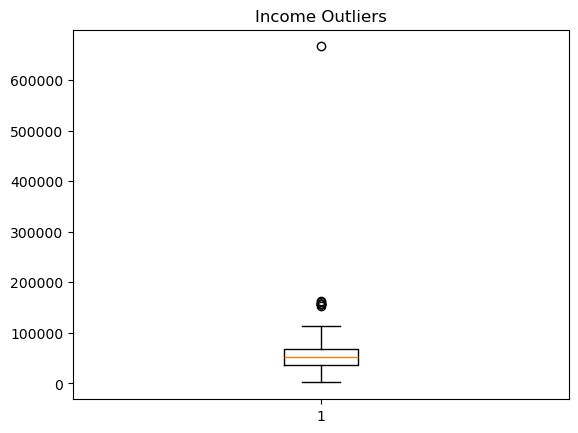

In [46]:
import matplotlib.pyplot as plt

plt.boxplot(data['Income'])
plt.title('Income Outliers')
plt.show()

In [48]:
# removing any extremes
q1 = data['Income'].quantile(0.25)
q3 = data['Income'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data = data[(data['Income'] >= lower_bound) & (data['Income'] <= upper_bound)]

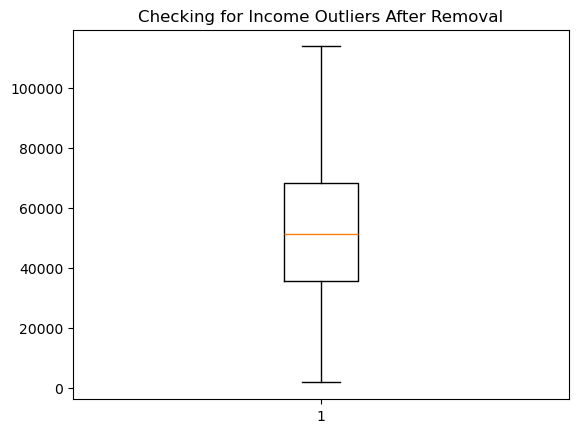

In [50]:
plt.boxplot(data['Income'])
plt.title('Checking for Income Outliers After Removal')
plt.show()

In [52]:
print(data.info())  
print(data.isnull().sum())  
print(data.describe())  

<class 'pandas.core.frame.DataFrame'>
Index: 2232 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2232 non-null   int64         
 1   Year_Birth           2232 non-null   int64         
 2   Education            2232 non-null   object        
 3   Marital_Status       2232 non-null   object        
 4   Income               2232 non-null   float64       
 5   Dt_Customer          2232 non-null   datetime64[ns]
 6   Recency              2232 non-null   int64         
 7   MntWines             2232 non-null   int64         
 8   MntFruits            2232 non-null   int64         
 9   MntMeatProducts      2232 non-null   int64         
 10  MntFishProducts      2232 non-null   int64         
 11  MntSweetProducts     2232 non-null   int64         
 12  MntGoldProds         2232 non-null   int64         
 13  NumDealsPurchases    2232 non-null   i